In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %config InlineBackend.figure_formats = ['svg']
sns.set(style="white", context='poster')
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [4]:
morder = ['OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [5]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [7]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [8]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [9]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [10]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [11]:
dpath = '../results/final/het'

In [12]:
dpath

'../results/final/het'

In [13]:
comb_df = pd.read_csv(os.path.join(dpath, 'integrated_last_core_models_versatile_het.csv.gz'))


In [14]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Bp Final', 'Np Final',
       ...
       'additionalLossRatep Integrated', 'additionalLossRateh Integrated',
       'deathC_DOCp Integrated', 'deathC_DOCh Integrated',
       'deathN_DONp Integrated', 'deathN_DONh Integrated', 'PP',
       'Total N uptake', 'PP / total fixed C', 'N reuse'],
      dtype='object', length=125)

In [15]:
def _change_col(c):
    suffixes = ('Integrated','Final')
    for suffix in suffixes:
        s = f' {suffix}'
        if c.endswith(s):
            c = c.replace(s, '')
            c= f'{suffix} {c}'
            return c
    return c
comb_df.rename(columns={c:_change_col(c) for c in comb_df.columns}, inplace=True)


In [16]:
list(comb_df.columns)

['model',
 'Phase',
 'VPRO',
 'Versatile',
 'run_id',
 'y_pred',
 'Sample',
 'max_prob',
 'Final Bp',
 'Final Np',
 'Final Cp',
 'Final Bh',
 'Final Nh',
 'Final Ch',
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 't',
 'day',
 'Final gross_uptakeINp',
 'Final gross_uptakeINh',
 'Final gross_uptakeONp',
 'Final gross_uptakeONh',
 'Final gross_uptakeICp',
 'Final gross_uptakeICh',
 'Final gross_uptakeOCp',
 'Final gross_uptakeOCh',
 'uptakeNp',
 'uptakeNh',
 'uptakeCp',
 'uptakeCh',
 'QCp',
 'QCh',
 'biosynthesisNp',
 'biosynthesisNh',
 'Final respirationCp',
 'Final respirationCh',
 'biomass_breakdownCp',
 'biomass_breakdownCh',
 'Final overflowNp',
 'Final overflowNh',
 'Final overflowCp',
 'Final overflowCh',
 'Bp[C]',
 'Final Bptotal[N]',
 'Final Bptotal[C]',
 'Bh[C]',
 'Final Bhtotal[N]',
 'Final Bhtotal[C]',
 'Final ROSproductionp',
 'Final ROSproductionh',
 'Final ROSlossp',
 'Final ROSlossh',
 'deathbiomassNp',
 'deathbiomass

In [17]:
comb_df['Final Organic C'] = comb_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]', 'Final Bhtotal[C]', ]].sum(axis=1)
comb_df['Integrated N uptake'] = comb_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp', 
                                          'Integrated gross_uptakeINh', 'Integrated gross_uptakeONh',  ]].sum(axis=1)

comb_df['Integrated C Biomassp'] = comb_df['Integrated Bptotal[C]']
comb_df['Integrated C Biomassh'] = comb_df['Integrated Bhtotal[C]']
comb_df['Integrated N Biomassp'] = comb_df['Integrated Bptotal[N]']
comb_df['Integrated N Biomassh'] = comb_df['Integrated Bhtotal[N]']



In [18]:
value_cols = [
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',

 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',

 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'
]



In [19]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'   
]:
    comb_df[i] = comb_df[i].div(comb_df.t) 

In [20]:
comb_df.rename(columns={c: c.replace('gross_uptake', 'Uptake ') for c in comb_df.columns}, inplace=True)

In [21]:
mcomb_df = comb_df.melt(
    id_vars=['model', 'run_id', 'y_pred', ],
    value_vars=value_cols
    #var_name='intergrated',
    
)

In [22]:
mcomb_df.variable.unique()

array(['Final DON', 'Final RDON', 'Final DIN', 'Final DOC', 'Final RDOC',
       'Final DIC', 'Final ROS', 'Integrated DON', 'Integrated RDON',
       'Integrated DIN', 'Integrated DOC', 'Integrated RDOC',
       'Integrated DIC', 'Integrated ROS', 'Integrated Uptake INp',
       'Integrated Uptake INh', 'Integrated Uptake ONp',
       'Integrated Uptake ONh', 'Integrated Uptake ICp',
       'Integrated Uptake ICh', 'Integrated Uptake OCp',
       'Integrated Uptake OCh', 'Integrated overflowNp',
       'Integrated overflowNh', 'Integrated overflowCp',
       'Integrated overflowCh', 'Integrated ROSproductionp',
       'Integrated ROSproductionh', 'Integrated ROSlossp',
       'Integrated ROSlossh', 'Integrated DON2DIN_exoh',
       'Integrated additionalLossRatep', 'Integrated additionalLossRateh',
       'Integrated deathC_DOCp', 'Integrated deathC_DOCh',
       'Integrated deathN_DONp', 'Integrated deathN_DONh', 'N reuse',
       'Final Organic C', 'Integrated N uptake', 'Integrated

In [23]:
mcomb_df['variable1'] = mcomb_df.variable.str[:-1]
mcomb_df['Strain'] = mcomb_df.variable.str[-1].map({'p' : 'PRO', 'P': 'PRO', 'h': 'HET', 'H': 'HET'})
#mcomb_df.loc[mcomb_df.variable.str.startswith('Bp'), 'Strain'] = 'PRO'
#mcomb_df.loc[mcomb_df.variable.str.startswith('Bh'), 'Strain'] = 'HET'


In [24]:
#mcomb_df
#mcomb_df.variable.str.split(' ', expand=True, n=1)
mcomb_df['assay'] = mcomb_df.variable.str.split(' ', expand=True, n=1)[0]

In [25]:
mcomb_df.Strain.value_counts(dropna=False)

Strain
NaN    851462
HET    701204
PRO    651118
Name: count, dtype: int64

In [26]:
mcomb_df.variable1.unique()

array(['Final DO', 'Final RDO', 'Final DI', 'Final RO', 'Integrated DO',
       'Integrated RDO', 'Integrated DI', 'Integrated RO',
       'Integrated Uptake IN', 'Integrated Uptake ON',
       'Integrated Uptake IC', 'Integrated Uptake OC',
       'Integrated overflowN', 'Integrated overflowC',
       'Integrated ROSproduction', 'Integrated ROSloss',
       'Integrated DON2DIN_exo', 'Integrated additionalLossRate',
       'Integrated deathC_DOC', 'Integrated deathN_DON', 'N reus',
       'Final Organic ', 'Integrated N uptak', 'Integrated C Biomass',
       'Integrated N Biomass'], dtype=object)

In [27]:
Nuptake_vars1 = [
     'Integrated Uptake IN',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
    
]
Cuptake_vars1 = [
    #'gross_uptakeIC', 
    'Integrated Uptake OC',
    'Integrated deathC_DOC',
    
]
loss_vars1 = [
]
biomass_vars1 = ['Integrated C Biomass',
       'Integrated N Biomass',]
       #  'overflowN', 'overflowC', 
       #  'ROSproduction', 'ROSloss',
       # 'DON2DIN_exo', 'additionalLossRate', 

In [28]:
overflow_N_vars =  [
         'Integrated Uptake IN',
    'Integrated overflowN',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
]
overflow_C_vars = Cuptake_vars1 + ['Integrated overflowC',]

exo_N_vars = [
         'Integrated Uptake IN',
    'Integrated DON2DIN_exo',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
    #'DON2DIN_exo',
]

exo_C_vars = Cuptake_vars1 

ROS_N_vars = Nuptake_vars1 
ROS_C_vars = Cuptake_vars1 
# 'additionalLossRate', ROS?
ROS_vars = [
    'Integrated ROSproduction', 'Integrated ROSloss',
]


In [29]:
sns.set_context('paper')

In [30]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Final Bp', 'Final Np',
       ...
       'PP', 'Total N uptake', 'PP / total fixed C', 'N reuse',
       'Final Organic C', 'Integrated N uptake', 'Integrated C Biomassp',
       'Integrated C Biomassh', 'Integrated N Biomassp',
       'Integrated N Biomassh'],
      dtype='object', length=131)

# BIO GEO chemical

# total PP and total N uptake

# efficiency 
# Total carbon fixation integrated vs final fixed carbon
# New production N vs recycled production


In [31]:
comb_df

,model,Phase,VPRO,Versatile,run_id,y_pred,Sample,max_prob,Final Bp,Final Np,...,PP,Total N uptake,PP / total fixed C,N reuse,Final Organic C,Integrated N uptake,Integrated C Biomassp,Integrated C Biomassh,Integrated N Biomassp,Integrated N Biomassh
0,EXOENZYME,init,vpro_11_62_EXOENZYME_C1,True,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,6C0,0.974799,0.189774,0.037612,...,3392.013607,662.232153,4.083412,6.429438,830.681150,662.232153,35.218538,95.660193,4.165977,23.629737
1,EXOENZYME,init,vpro_19_83_EXOENZYME_C1,True,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,Sustained,7B0,0.377493,0.112971,0.030997,...,2715.276632,617.857035,3.828681,5.998612,709.193838,617.857035,21.429461,78.390695,2.812101,19.579641
2,EXOENZYME,init,vpro_19_83_EXOENZYME_C1,True,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,Sustained,7B0,0.976839,0.221242,0.060235,...,3322.877805,604.641399,4.237722,5.870305,784.118909,604.641399,26.370281,98.718603,3.452752,26.932746
3,EXOENZYME,init,vpro_23_76_EXOENZYME_C2,True,monte_EXOENZYME_100_monte_vpro_23_76_EXOENZYME...,Sustained,7A0,0.960090,1.652114,0.181078,...,5010.989125,855.363385,5.747878,8.304499,871.798130,855.363385,78.080014,123.708330,10.225440,30.982599
4,EXOENZYME,init,vpro_39_73_EXOENZYME_C2,True,monte_EXOENZYME_100_monte_vpro_39_73_EXOENZYME...,Weak,11A0,0.965416,0.002081,0.000372,...,901.652705,369.780635,1.482293,3.590103,608.282368,369.780635,10.666323,13.126725,1.527089,3.144511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50081,ROS,add,vpro_19_33_ROS_C0_684,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_684_23_...,Strong,5x5_21B0,0.942628,2.141059,0.031417,...,3403.430449,273.500284,4.732945,2.655343,719.093599,273.500284,136.863135,18.861133,14.672990,4.937333
50082,ROS,add,vpro_19_33_ROS_C0_912,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_912_33_...,Strong,5x5_21B0,0.968076,2.863904,0.043200,...,3566.770328,298.910226,10.195182,2.902041,349.848632,298.910226,145.113712,34.973636,15.515652,8.135469
50083,ROS,add,vpro_19_33_ROS_C0_932,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_932_42_...,Strong,5x5_21A0,0.980187,3.947607,0.030296,...,4430.535658,407.738040,9.106391,3.958622,486.530341,407.738040,207.718633,27.721930,22.098025,6.114775
50084,ROS,add,vpro_19_33_ROS_C0_979,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,10C0,0.407143,0.380849,0.012095,...,1373.751552,349.485154,2.469820,3.393060,556.215166,349.485154,40.293504,9.031929,4.459793,2.053807


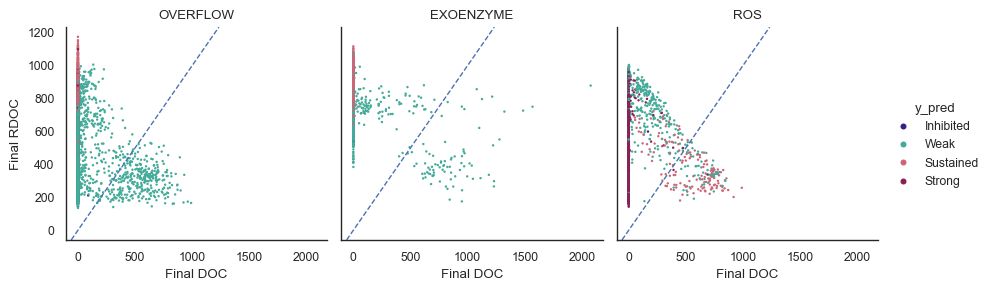

In [32]:
plt.rcParams["legend.markerscale"] = 2.5
g = sns.relplot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    y='Final RDOC', x='Final DOC',
    col='model', col_order=morder,
    s=3, lw=0,
 height=3,   
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')

# #g.set(ylim=(0,850),xlim=(0,850), )
# g.set(yscale='log', #ylim=(5e-3, 40)
#      )
#g.set(ylabel='final RDOC', xlabel='final DOC')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

In [33]:
value_cols

['Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Int

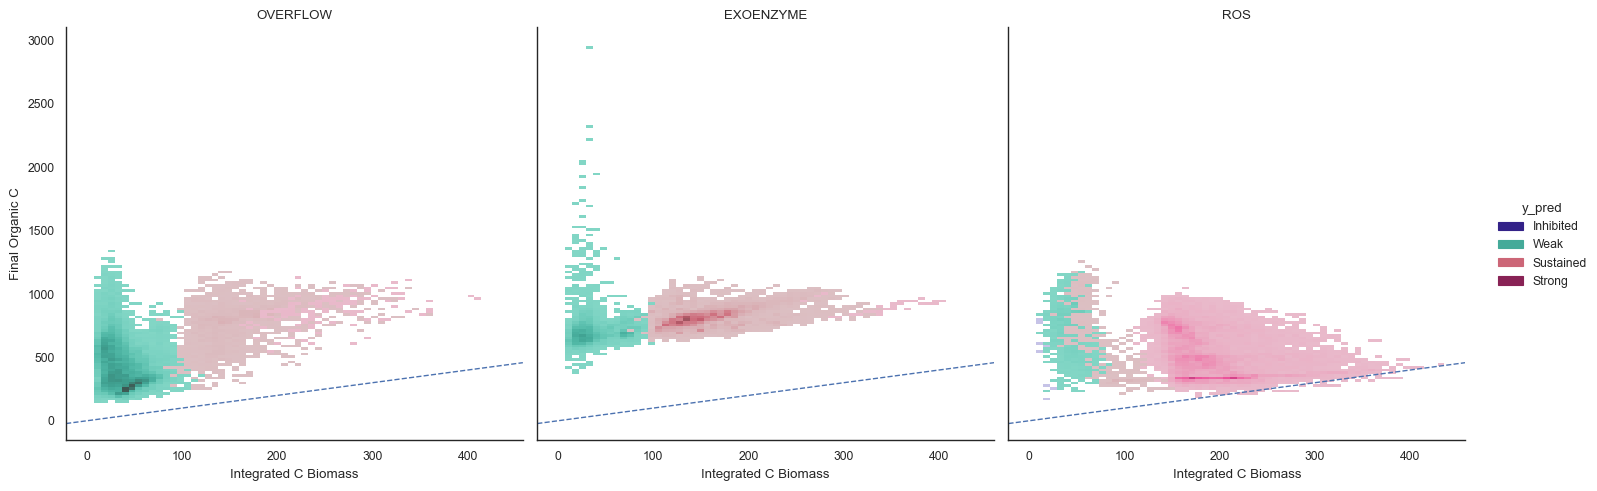

In [34]:
comb_df['Integrated C Biomass']  = comb_df['Integrated C Biomassp'] +comb_df['Integrated C Biomassh']
comb_df['Integrated N Biomass']  = comb_df['Integrated N Biomassp'] +comb_df['Integrated N Biomassh']
plt.rcParams["legend.markerscale"] = 2.5

g = sns.displot(
    data=comb_df,    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    y='Final Organic C', x='Integrated C Biomass',
    col='model', col_order=morder,
    #s=1, lw=0,
    #height=2,
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')

#g.set(ylim=(0,850),xlim=(0,850), )
#g.set(yscale='log', #ylim=(5e-3, 40)
#     )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

In [35]:
comb_df['Carbon Use Efficiency'] = comb_df['Final Organic C'].div(comb_df['Integrated Uptake ICp'] )


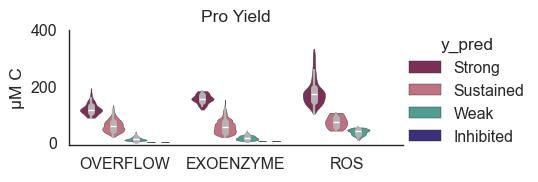

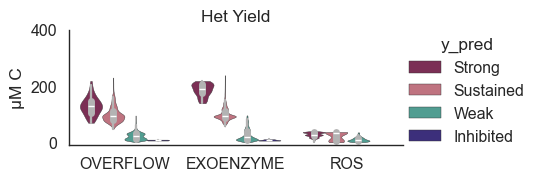

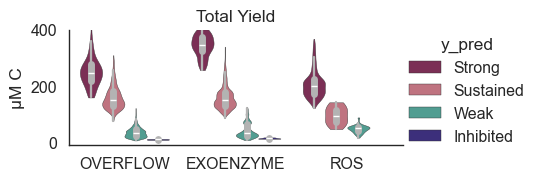

In [36]:
sns.set_context('paper', font_scale=1.3)
for c,t in zip(
    ['Integrated C Biomassp', 'Integrated C Biomassh', 'Integrated C Biomass', ],
    ['Pro Yield', 'Het Yield', 'Total Yield', ],
):
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])& comb_df.Phase.isin(['init', 'extend'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        #col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=2.2,
        linewidth=0.3, 
        height=2,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
       # legend=False,
    )
    #if c == 'Final Organic C':
    g.set(ylim=(-10,400), ylabel=f'µM C', xlabel='')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(t)
    plt.show()

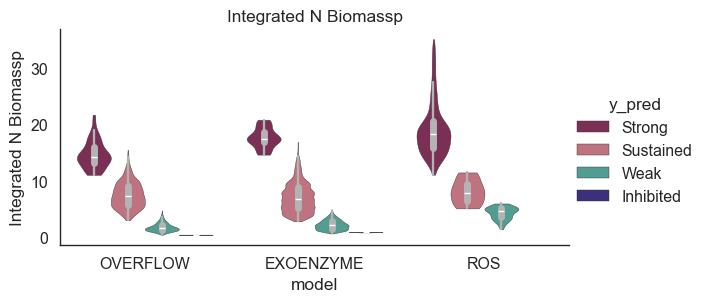

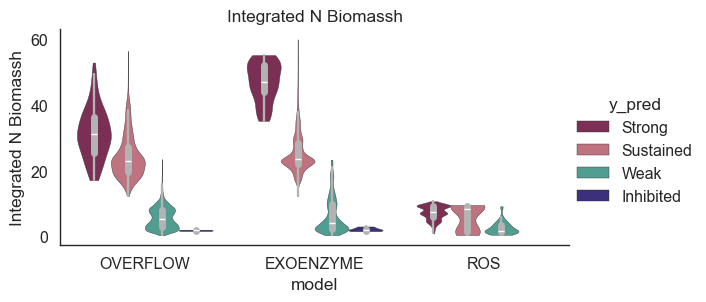

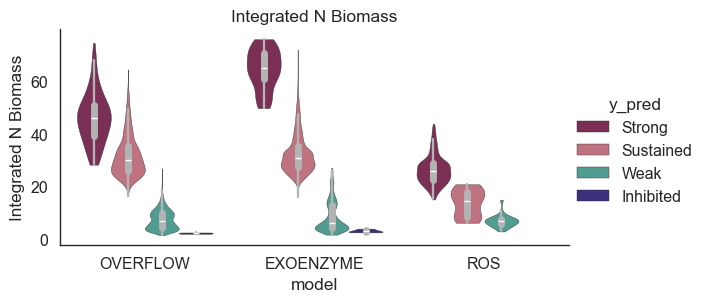

In [37]:
sns.set_context('paper', font_scale=1.3)
for c in ['Integrated N Biomassp', 'Integrated N Biomassh', 'Integrated N Biomass', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])& comb_df.Phase.isin(['init', 'extend'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

In [38]:
comb_df['Final RDOC / Organic C'] = comb_df['Final RDOC'].div(comb_df['Final Organic C'])
comb_df['Final RDON / Total N'] = comb_df['Final RDON'].div(INIT_BH+INIT_BP+INIT_DIN+ INIT_DON)

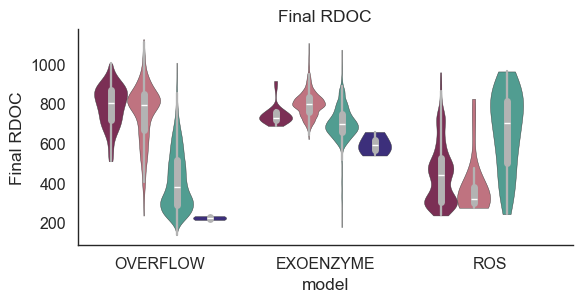

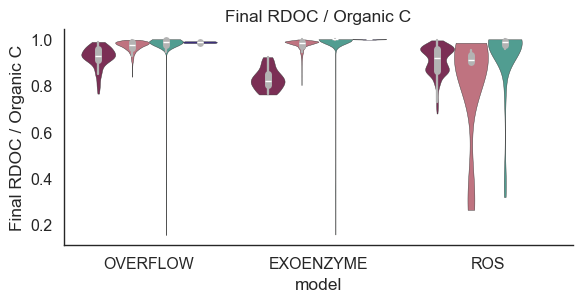

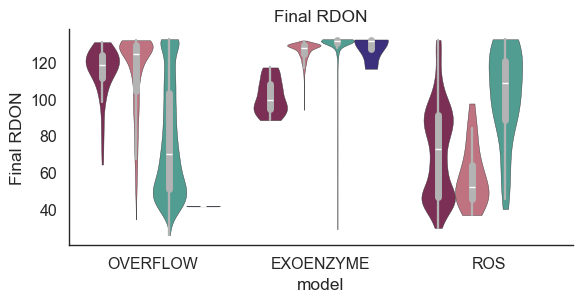

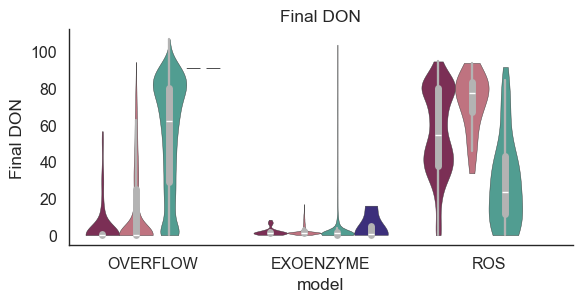

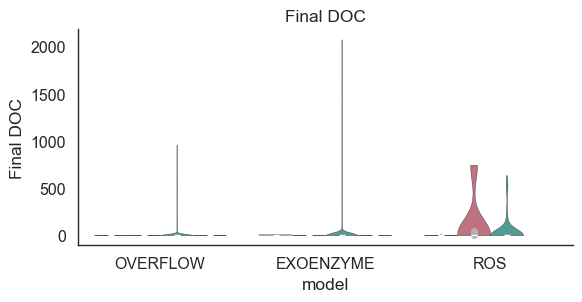

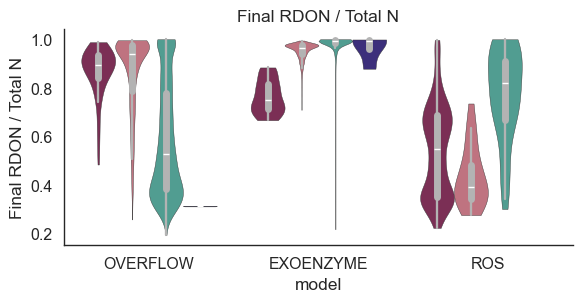

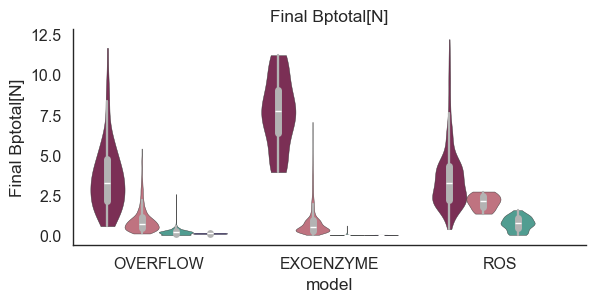

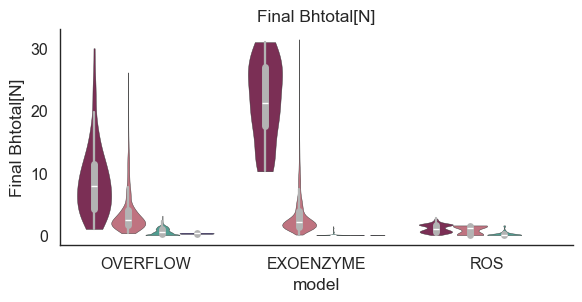

In [39]:
sns.set_context('paper', font_scale=1.3)
for c in ['Final RDOC', 'Final RDOC / Organic C', 'Final RDON', 'Final DON', 'Final DOC', 'Final RDON / Total N',  'Final Bptotal[N]', 'Final Bhtotal[N]',]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])& comb_df.Phase.isin(['init', 'extend'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

[Text(0.5, 8.84444444444445, '')]

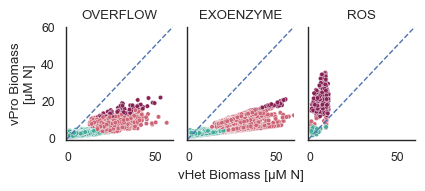

In [40]:
sns.set_context('paper') #, font_scale=1.3)
g = sns.relplot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile],
     y='Integrated N Biomassp', x='Integrated N Biomassh',
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    col='model', col_order=morder, s=10,
    legend=False, aspect=0.7, height=2,
)
g.set_titles(col_template='{col_name}')
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')

g.set(ylabel='vPro Biomass\n[µM N]', xlabel='vHet Biomass [µM N]', 
      xlim=(-1,60), 
      ylim=(-1,60), 
     )
g.axes_dict['OVERFLOW'].set(xlabel='')
g.axes_dict['ROS'].set(xlabel='')

In [41]:
from scipy.stats import pearsonr, spearmanr
for m in morder:
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin([m])]
    i = pearsonr(data['Integrated C Biomassp'],data['Integrated C Biomassh'])
    print(m, np.round(i[0], 2), i[1])


OVERFLOW 0.86 0.0
EXOENZYME 0.77 0.0
ROS 0.45 3.8613207137814998e-31


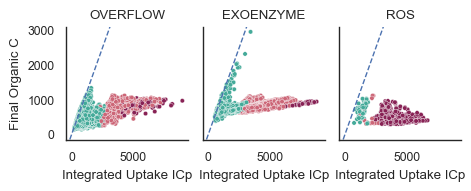

In [42]:
sns.set_context('paper') #, font_scale=1.3)
g = sns.relplot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile],
     y='Final Organic C', x='Integrated Uptake ICp',
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    col='model', col_order=morder, s=10,
    legend=False, aspect=0.8, height=2,
)
g.set_titles(col_template='{col_name}')
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')


In [43]:
comb_df.head().columns.to_list()

['model',
 'Phase',
 'VPRO',
 'Versatile',
 'run_id',
 'y_pred',
 'Sample',
 'max_prob',
 'Final Bp',
 'Final Np',
 'Final Cp',
 'Final Bh',
 'Final Nh',
 'Final Ch',
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 't',
 'day',
 'Final Uptake INp',
 'Final Uptake INh',
 'Final Uptake ONp',
 'Final Uptake ONh',
 'Final Uptake ICp',
 'Final Uptake ICh',
 'Final Uptake OCp',
 'Final Uptake OCh',
 'uptakeNp',
 'uptakeNh',
 'uptakeCp',
 'uptakeCh',
 'QCp',
 'QCh',
 'biosynthesisNp',
 'biosynthesisNh',
 'Final respirationCp',
 'Final respirationCh',
 'biomass_breakdownCp',
 'biomass_breakdownCh',
 'Final overflowNp',
 'Final overflowNh',
 'Final overflowCp',
 'Final overflowCh',
 'Bp[C]',
 'Final Bptotal[N]',
 'Final Bptotal[C]',
 'Bh[C]',
 'Final Bhtotal[N]',
 'Final Bhtotal[C]',
 'Final ROSproductionp',
 'Final ROSproductionh',
 'Final ROSlossp',
 'Final ROSlossh',
 'deathbiomassNp',
 'deathbiomassNh',
 'deathstoreNp',
 'deathstoreNh',
 

In [44]:
comb_df['Het/Pro C yield'] = comb_df['Integrated C Biomassh'].div(comb_df['Integrated C Biomassp'])


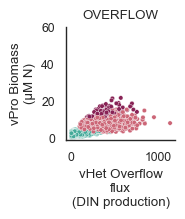

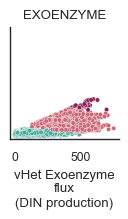

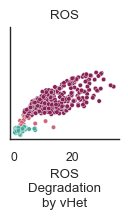

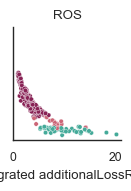

In [45]:
import colorcet 
sns.set_context('paper') #, font_scale=1.3)
for m, c,xlabel in zip(['OVERFLOW', 'EXOENZYME', 'ROS', 'ROS'], 
                [ 'Integrated overflowNh','Integrated DON2DIN_exoh','Integrated ROSlossh', 'Integrated additionalLossRatep',], 
                [ 'vHet Overflow\nflux\n(DIN production)','vHet Exoenzyme\nflux\n(DIN production)','ROS\nDegradation\nby vHet', 'Integrated additionalLossRatep',], 
               ):
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.model.isin([m]) & comb_df.Versatile],
         x=c, y='Integrated N Biomassp',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', #col_order=morder, 
        s=10,
        legend=False, aspect=0.9, height=2,
    )
    g.set_titles(col_template='{col_name}')
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='vPro Biomass\n(µM N)', xlabel=xlabel, 
      ylim=(-1,60), 
         )
    if c != 'Integrated overflowNh':
        g.set(ylabel='', yticks=[])
        

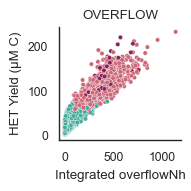

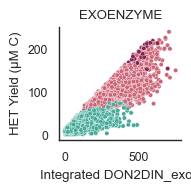

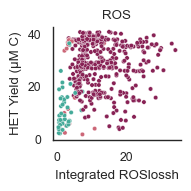

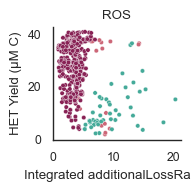

In [46]:
import colorcet 
#sns.set_context('poster') #, font_scale=1.3)
for m, c in zip(['OVERFLOW', 'EXOENZYME', 'ROS', 'ROS'], [ 'Integrated overflowNh',
 'Integrated DON2DIN_exoh','Integrated ROSlossh', 'Integrated additionalLossRatep',]):
    g = sns.relplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.model.isin([m]) & comb_df.Versatile],
         x=c, y='Integrated C Biomassh',
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        col='model', #col_order=morder, 
        s=10,
        legend=False, aspect=1, height=2,
    )
    g.set_titles(col_template='{col_name}')
    # for col_val, ax in g.axes_dict.items():
    #     ax.axline((0,0), (20,20),lw=1, ls='--')
    
    g.set(ylabel='HET Yield (µM C)', #ylabel='HET Yield (µM C)', 
          #xlim=(0,400), ylim=(0,400)
         )

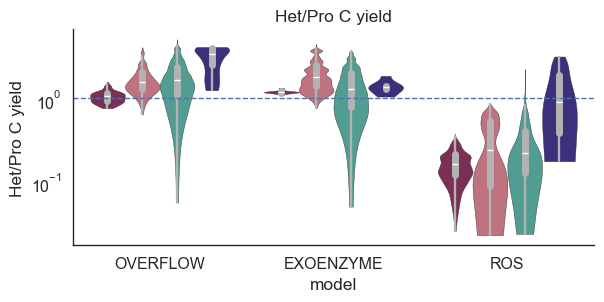

In [47]:
sns.set_context('paper', font_scale=1.3)
for c in ['Het/Pro C yield',]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
        
    g.set(#ylim=(5e-2,20),
          yscale='log')
    plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

In [48]:
pca_data_cols_full = [
    
 'Final RDON',
 'Final RDOC',
 'Final DON',
 'Final DOC',
 'Total N uptake',
 'N reuse',
 'Final Organic C',
 #'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh',
 'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]

pca_data_cols = [
    
 'Final RDON',
 'Final RDOC',
 'Total N uptake',
 #'N reuse',
 'Final Organic C',
 #'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 #'Integrated N Biomassp',
 #'Integrated N Biomassh',
 #'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]

In [49]:
core_df = comb_df.loc[comb_df.y_pred.isin(gorder1)& comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin(morder)]


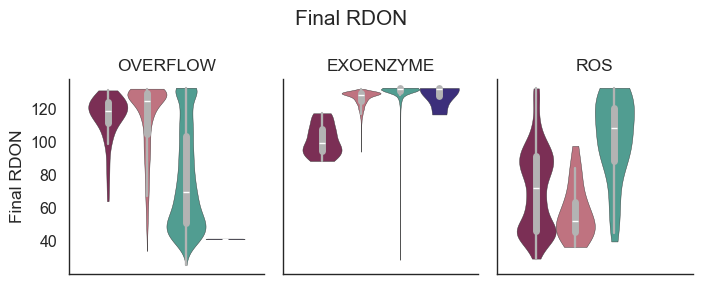

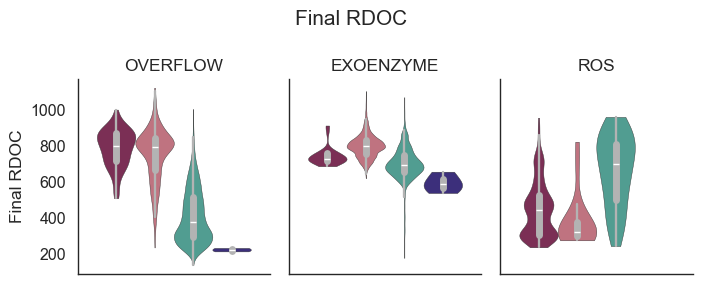

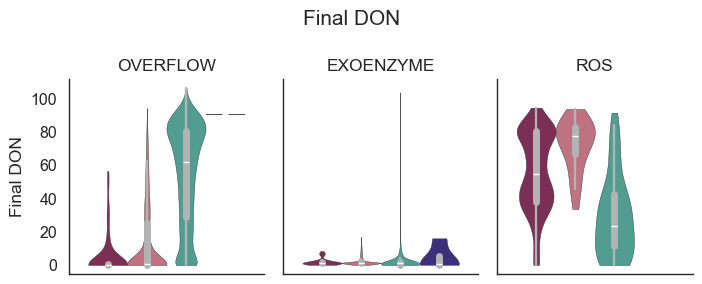

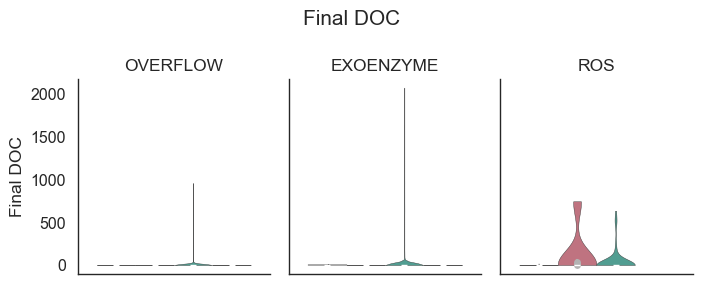

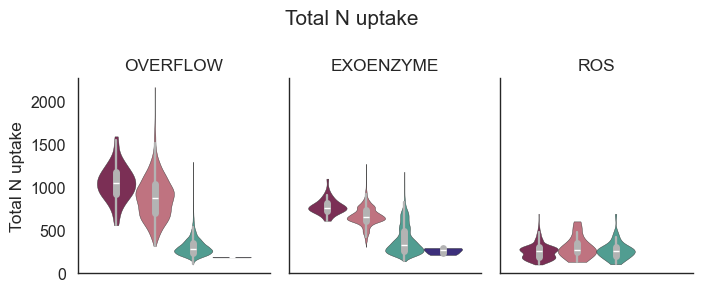

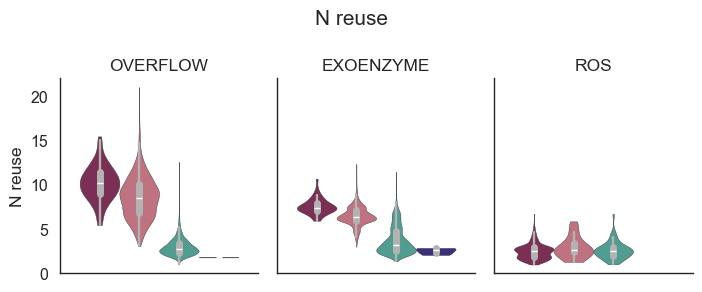

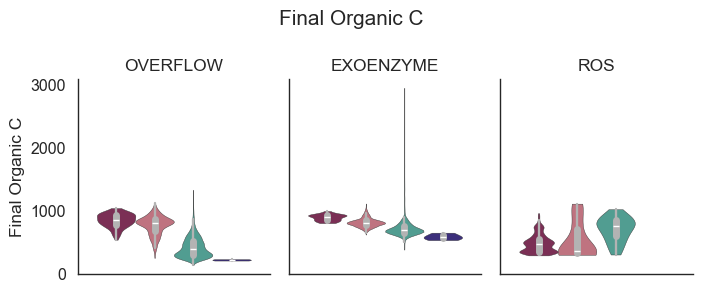

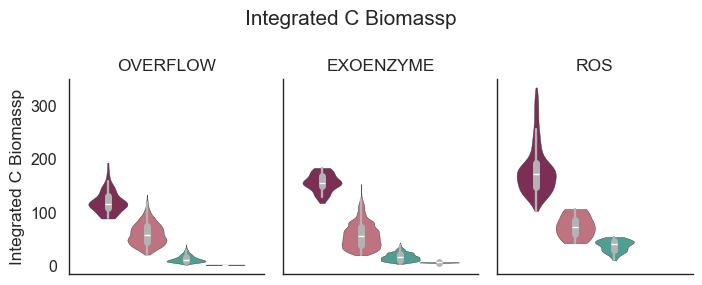

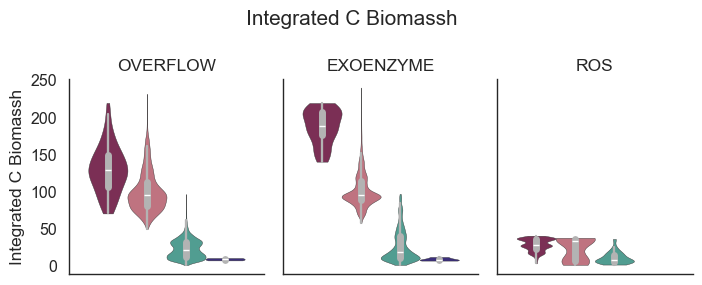

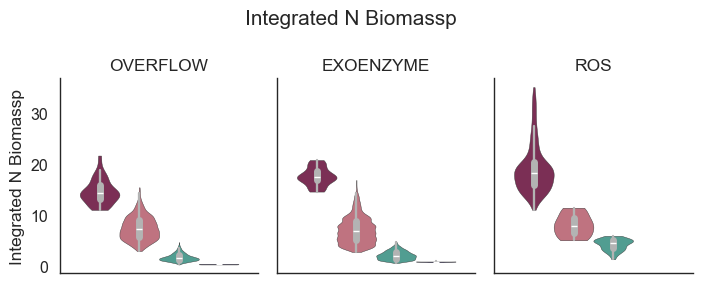

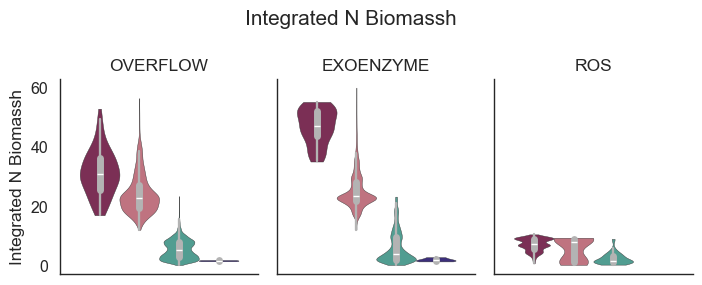

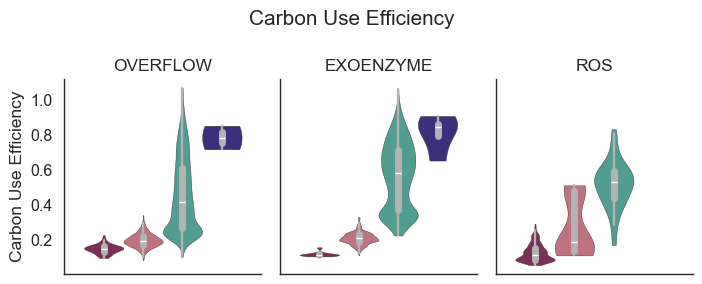

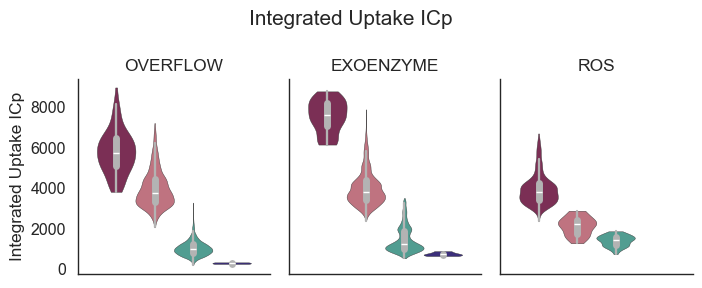

In [50]:
sns.set_context('paper', font_scale=1.3)
for c in pca_data_cols_full:
    g = sns.catplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=0.8,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    g.set_titles(col_template='{col_name}')
    g.set(xticks=[], xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(c, y=1.1)
    plt.show()

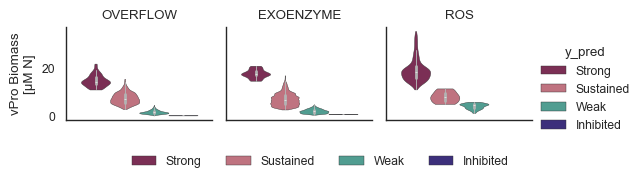

In [51]:
sns.set_context('paper', font_scale=1)
for c in ['Integrated N Biomassp']:
    g = sns.catplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', # dodge=False,order=gorder1,
        col='model', col_order=morder, sharex=False,
        kind='violin', #split=True,
        aspect=1,
        linewidth=0.3, 
        height=1.8,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=2, color=".7", ),
        #legend=False,
    )
    g.set_titles(col_template='{col_name}')
    g.set(xticks=[],
          xlabel='', ylabel='vPro Biomass\n[µM N]')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    #plt.suptitle('vPro Biomass', y=1.1)
    parent_mpl_figure = g.fig
    parent_mpl_figure.legend(loc='lower center', ncols=4, frameon=False)
    plt.show()

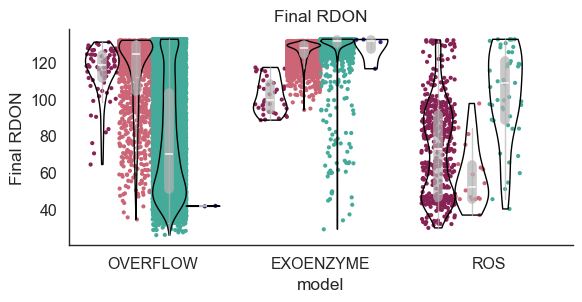

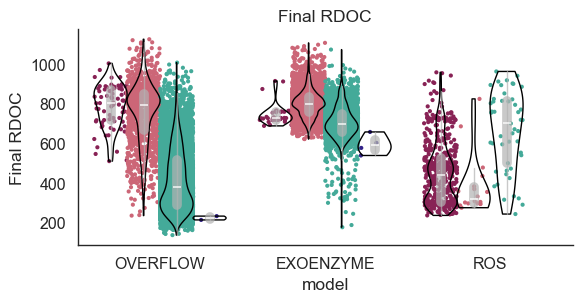

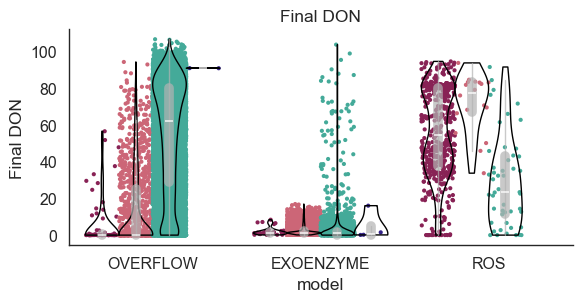

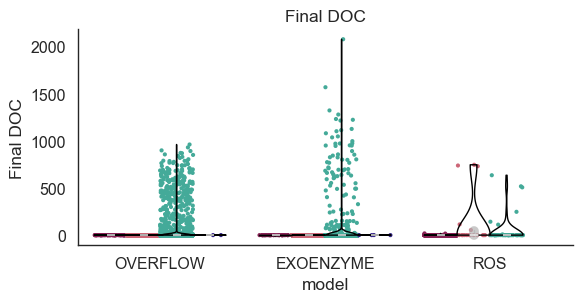

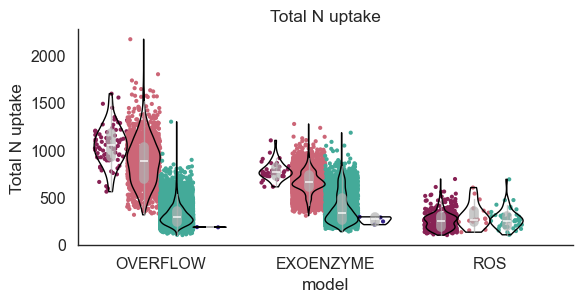

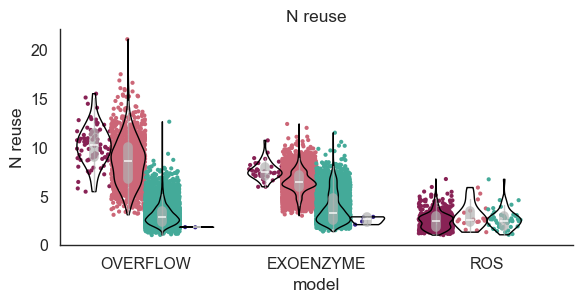

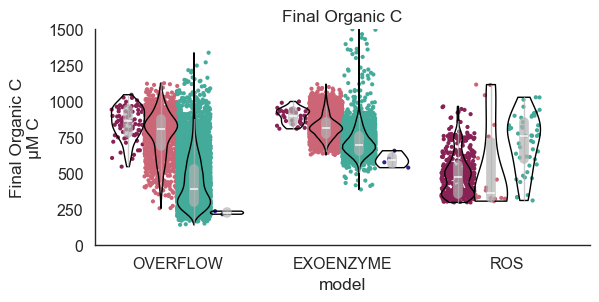

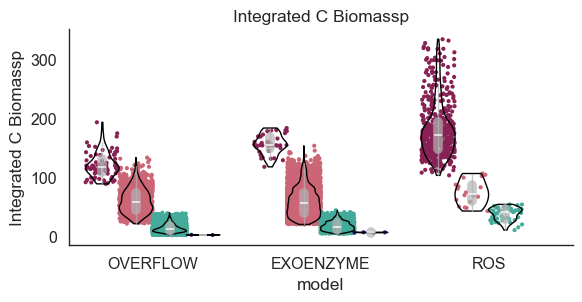

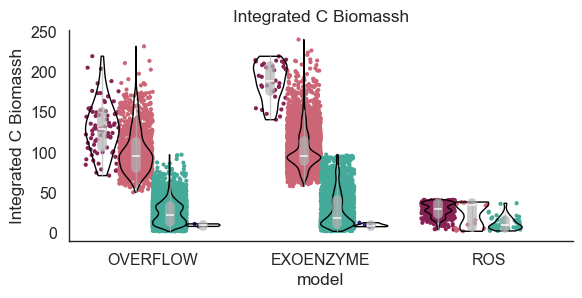

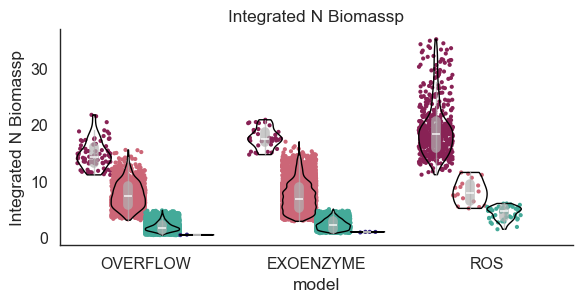

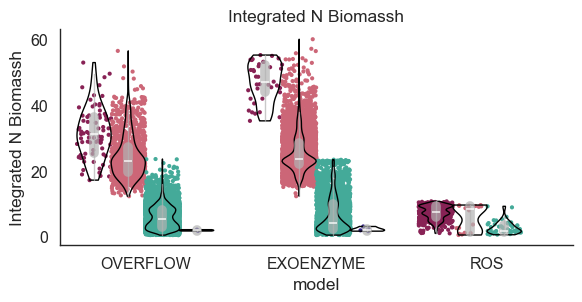

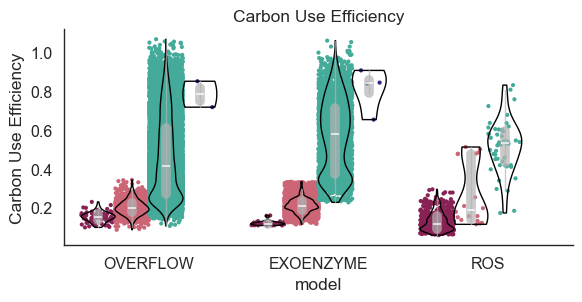

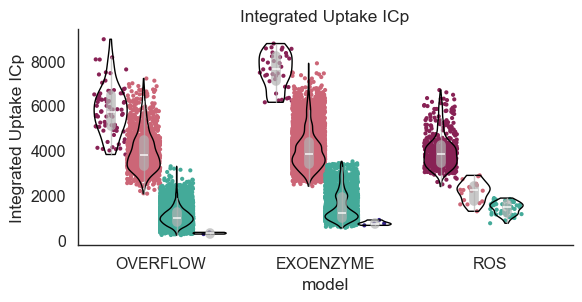

In [52]:
sns.set_context('paper', font_scale=1.3)
for c in pca_data_cols_full:
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=1, 
        height=3,
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
         inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
    )
    sns.stripplot(
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        size=3, dodge=True, jitter=0.4, zorder=-100,
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
    
    #g.set(ylabel=stage)
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

In [53]:
pca_data_cols_full
final_figure_cols = ['Final RDOC','N reuse','Carbon Use Efficiency','Final Organic C',]
final_figure_titles = ['Final RDOC','N Reuse','Carbon Use Efficiency','Final Organic C',]
final_figure_ylabel = ['µM C','N Reuse','Carbon Use Efficiency','µM C',]


In [54]:
final_figure_ylim = [(0,1500), (-3,20), (-0.1,1.1), (0,1500)]

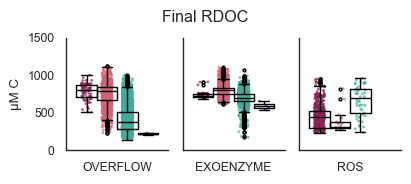

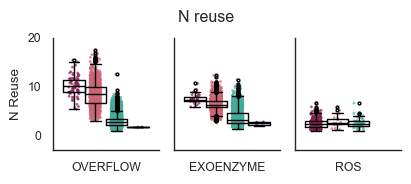

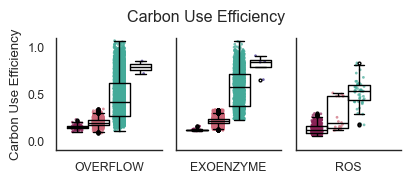

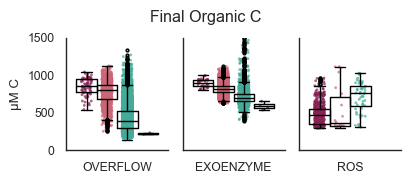

In [55]:
sns.set_context('paper', font_scale=1)
for c,title,ylabel, ylim in zip(final_figure_cols, final_figure_titles, final_figure_ylabel, final_figure_ylim):
    g = sns.catplot(
        data=core_df,
        #data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, 
        #palette=gpalette1,
        palette=['black','black','black','black',],
        x='model', #order=morder,
        col='model', col_order=morder, sharex=False,
        kind='box', #split=True,
        aspect=0.7,
        linewidth=1, 
        height=2, 
        #size=4, dodge=True, jitter=0.5,
        #split=True,
        #common_norm=False, cut=0, density_norm='width',
        fill=None,
        #inner='quart',
        # inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, alpha=0.7),
        #log_scale=True,
         #inner_kws=dict( box_width=5, color=".7", ),
        linecolor='grey',
        legend=False,
        flierprops=dict(markersize=2,)
    )
    g.map_dataframe(sns.stripplot,
        data=core_df,
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', #order=morder,
        size=2, dodge=True, jitter=0.2, zorder=-100, alpha=0.7,
        legend=False,
    )
    if c == 'Final Organic C' or c== 'Final RDOC':
        g.set(ylim=(0,1500)) # , ylabel=f'{c}\nµM C')
    
    g.set(ylabel=ylabel, title='', ylim=ylim,
          xlabel='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(c)
    plt.show()

In [56]:
def get_next_unused_letter(columns):
    """
    Identify the next unused lowercase letter to use for compact lettering.
  
    Parameters:
    columns (list of strs): List of current column groups.

    Returns:
    str or None: Returns the next available lowercase letter, or None if all 26 letters are already used.
    """
    used_letters = set(letter for col in columns for letter in col if letter != '')
    
    # Iterate through the alphabet to find an unused letter.
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        if letter not in used_letters:
            return letter
    
    # Return None if all letters are used (which should only happen with >26 columns).
    return None  

def absorb_columns(columns):
    """
    Absorbs redundant columns by comparing indices.

    Parameters:
    columns (list of strs): List of current column groups.

    Returns:
    list of strs: The processed list of column groups.
    """
    absorbed = True
    while absorbed:
        absorbed = False
        for i, col1 in enumerate(columns):
            for j, col2 in enumerate(columns):
                if i != j:
                    indices1 = {index for index, letter in enumerate(col1) if letter != ''}
                    indices2 = {index for index, letter in enumerate(col2) if letter != ''}
                    if indices1.issubset(indices2):
                        absorbed = True
                        columns.pop(i)
                        break
            if absorbed:
                break
    return columns

def compact_letter_display(significant_pairs, columns):
    """
    Generate compact letter display (CLD) for columns based on significant pairs.
    
    Parameters:
    significant_pairs (list of tuples): Significant pairs identified in a Tukey HSD test.
    columns (list of str): Columns in the DataFrame.

    Returns:
    list of str: The compact letter display representation.
    """
    num_groups = len(columns)

    # Map column names to indices.
    col_to_index = {col: idx for idx, col in enumerate(columns)}

    # Map significant pair names to indices.
    significant_pairs = [(col_to_index[col1], col_to_index[col2]) for col1, col2 in significant_pairs]


    columns = [['a'] * num_groups]
    for pair_idx, (i, j) in enumerate(significant_pairs):
        connected = False
        for idx, column in enumerate(columns):
            # When current pair have the same letter...
            if column[i] == column[j] and column[i] != '':
                connected = True
                new_letter = get_next_unused_letter(columns)
                new_column = column.copy() 
                new_column = [new_letter if column[i] != '' else '' for i in range(num_groups)]
                new_column[i] = ''
                column[j] = ''
                columns[idx] = column
                columns.append(new_column)
                columns = absorb_columns(columns)
            if connected:
                break 

    # Generate compact letter displays from the columns list.
    result = [''.join(columns[k][n] for k in range(len(columns)) if columns[k][n] != '') for n in range(num_groups)]
 
    return result

In [57]:
morder

['OVERFLOW', 'EXOENZYME', 'ROS']

In [58]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for c in [ 
    #'Final RDON',
 'Final RDOC',
 #'Final DON',
 #'Final DOC',
 'Final Organic C',
 'N reuse',
 'Carbon Use Efficiency',
]:
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin(morder)].copy()
    colnospace = c.replace(' ', '')
    data[colnospace] = data[c]
    data['model_y_pred'] = data['model'] + ' ' + data['y_pred']
    
    # Conduct one-way ANOVA
    print('####################################################################')
    print (c)
    model = ols(f'{colnospace} ~ C(model_y_pred)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)  # Type 1 ANOVA DataFrame
    print(anova_table)
    # Conduct Tukey's test
    tukey = pairwise_tukeyhsd(endog=data[colnospace], groups=data['model_y_pred'], alpha=0.05)
    groups_for_tucky = [f'{m} {y}' for m in morder for y in gorder1 if f'{m} {y}' in data.model_y_pred.values]
    
    print(tukey)
    print('####################################################################')
    pair_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
    significant_pairs = pair_df[pair_df['reject'] == True][['group1', 'group2']].values.tolist()
    #print (list(zip(groups_for_tucky,compact_letter_display(significant_pairs, groups_for_tucky))))
    print (c)
    print (groups_for_tucky)
    print (' '.join(compact_letter_display(significant_pairs, groups_for_tucky)))

    print('####################################################################')
    print('####################################################################')


####################################################################
Final RDOC
                      df        sum_sq       mean_sq           F  PR(>F)
C(model_y_pred)     10.0  6.779539e+08  6.779539e+07  4402.66886     0.0
Residual         21404.0  3.295938e+08  1.539870e+04         NaN     NaN
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1              group2        meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------
EXOENZYME Inhibited    EXOENZYME Strong  151.0658 0.4248  -59.1787  361.3104  False
EXOENZYME Inhibited EXOENZYME Sustained  207.3682 0.0341    7.5723  407.1642   True
EXOENZYME Inhibited      EXOENZYME Weak  109.5774 0.8009  -90.2757  309.4306  False
EXOENZYME Inhibited  OVERFLOW Inhibited  -370.617 0.0239 -716.5519  -24.6822   True
EXOENZYME Inhibited     OVERFLOW Strong  193.2247  0.085   -11.558  398.0074  False
EXOENZYME Inhibited  OVERFLOW

In [59]:
groups_for_tucky = [f'{m} {y}' for m in morder for y in gorder1 if f'{m} {y}' in data.model_y_pred.values]
groups_for_tucky

['OVERFLOW Strong',
 'OVERFLOW Sustained',
 'OVERFLOW Weak',
 'OVERFLOW Inhibited',
 'EXOENZYME Strong',
 'EXOENZYME Sustained',
 'EXOENZYME Weak',
 'EXOENZYME Inhibited',
 'ROS Strong',
 'ROS Sustained',
 'ROS Weak']

In [60]:
pair_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
significant_pairs = pair_df[pair_df['reject'] == True][['group1', 'group2']].values.tolist()
significant_pairs
print (list(zip(groups_for_tucky,compact_letter_display(significant_pairs, groups_for_tucky))))


[('OVERFLOW Strong', 'bh'), ('OVERFLOW Sustained', 'bcg'), ('OVERFLOW Weak', 'e'), ('OVERFLOW Inhibited', 'ade'), ('EXOENZYME Strong', 'bh'), ('EXOENZYME Sustained', 'c'), ('EXOENZYME Weak', 'ad'), ('EXOENZYME Inhibited', 'a'), ('ROS Strong', 'gh'), ('ROS Sustained', 'bch'), ('ROS Weak', 'de')]


In [61]:
tukey.reject

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True])

In [62]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for c in [ 
    'Final RDON',
 'Final RDOC',
 'Final DON',
 #'Final DOC',
 'Final Organic C',
 'N reuse',
 'Carbon Use Efficiency',
]:
    for m in morder:
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other']) & comb_df.Phase.isin(['init', 'extend']) & comb_df.Versatile & comb_df.model.isin([m])].copy()
        colnospace = c.replace(' ', '')
        data[colnospace] = data[c]
        # Conduct one-way ANOVA
        print('####################################################################')
        print (m, c)
        model = ols(f'{colnospace} ~ C(y_pred)', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=1)  # Type 1 ANOVA DataFrame
        print(anova_table)
        # Conduct Tukey's test
        tukey = pairwise_tukeyhsd(endog=data[colnospace], groups=data['y_pred'], alpha=0.05)
        print(tukey)
    print('####################################################################')
    print('####################################################################')
    print('####################################################################')


####################################################################
OVERFLOW Final RDON
                df        sum_sq        mean_sq           F  PR(>F)
C(y_pred)      3.0  1.608466e+06  536155.489816  609.732274     0.0
Residual   11959.0  1.051590e+07     879.329360         NaN     NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
Inhibited    Strong  73.4319 0.0031  18.8701 127.9938   True
Inhibited Sustained  72.8003 0.0029  18.8822 126.7184   True
Inhibited      Weak  36.1197 0.3119 -17.7609  90.0002  False
   Strong Sustained  -0.6316 0.9978   -9.521   8.2577  False
   Strong      Weak -37.3123    0.0 -45.9709 -28.6537   True
Sustained      Weak -36.6806    0.0 -38.9484 -34.4128   True
------------------------------------------------------------
####################################################################
EXOENZYME Final RDON
       

In [63]:
corr_data_cols = [
    
 'Final RDON',
 'Final RDOC',
 'Final DON',
 'Final DOC',
 'N reuse',
 'Final Organic C',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Carbon Use Efficiency',
    'Integrated Uptake ICp',
]


In [64]:
from scipy.stats import pearsonr, spearmanr, false_discovery_control
#corr_toremove = 
def _get_corr_matrix(comb_df, params_to_add, pca_cols, threshold=0.3, params_on_cols=False):
    rho = comb_df[params_to_add + pca_cols].corr(method='spearman')    
    pval = comb_df[params_to_add + pca_cols].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
    #pvaladj = pd.DataFrame(false_discovery_control(pval, axis=None), index=pval.index, columns=pval.columns)
    p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
    rho_text = rho.round(1).astype(str) +'\n'+ p    
    rho1 = rho[np.abs(rho[pca_cols]).ge(threshold).sum(axis=1).ge(1)]
    rho2 = rho1[rho1.index]
    if params_on_cols:
        cols = [c for c in rho2.columns if c in params_to_add]
        index_list = [c for c in rho2.columns if c not in  params_to_add]
        rho2 = rho2.reindex(columns=cols, index=index_list)
    rho_text = rho_text.reindex(columns=rho2.columns, index=rho2.index)
        
    return (rho2, rho_text)

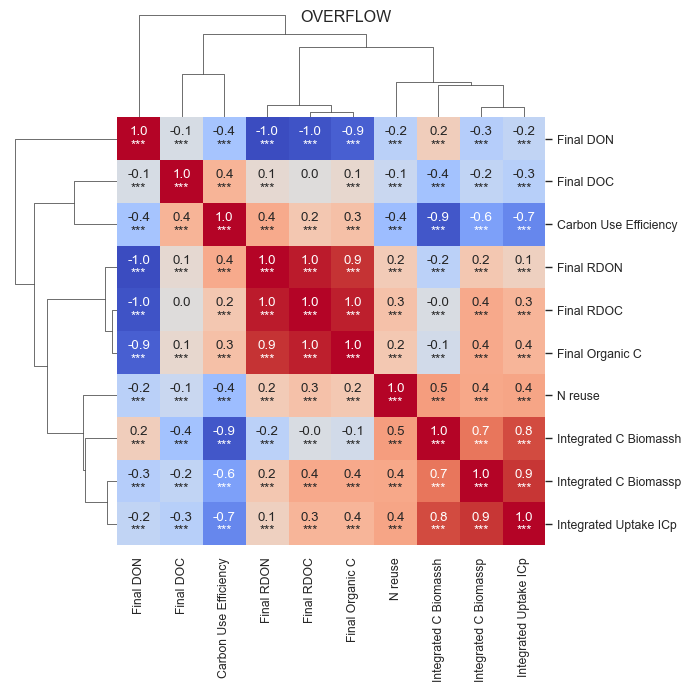

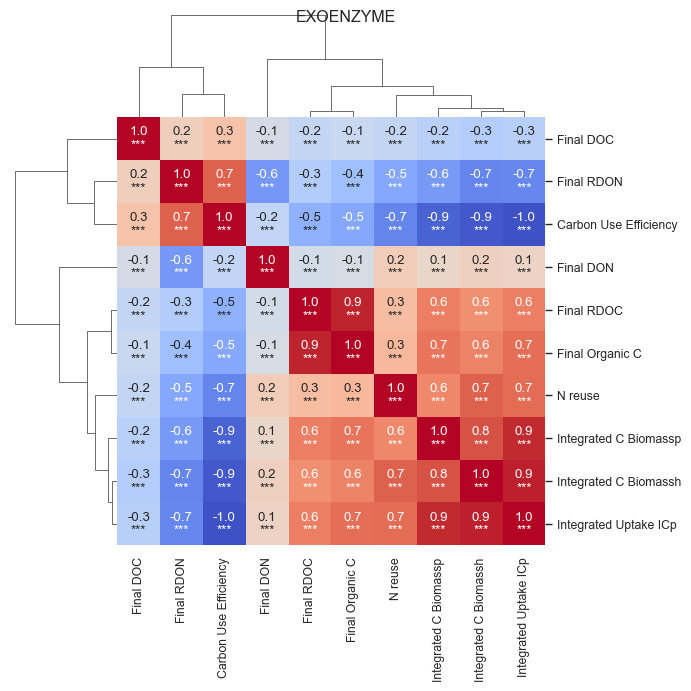

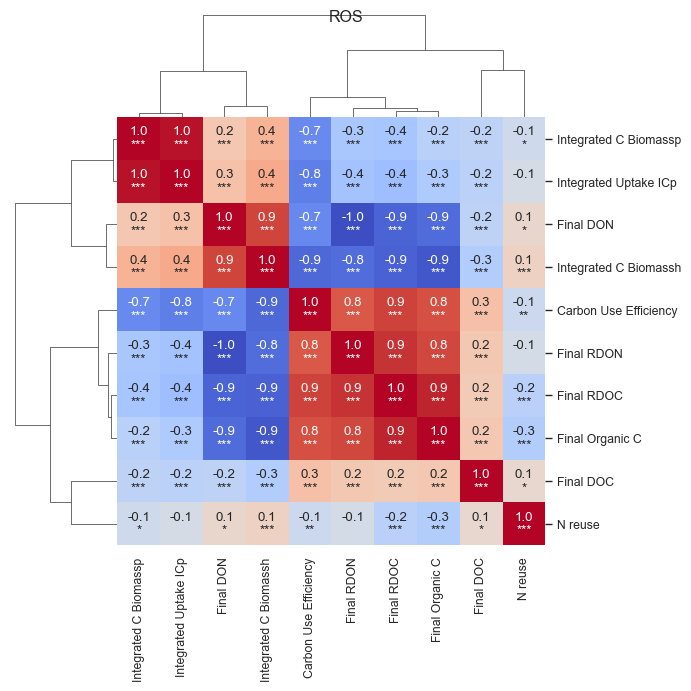

In [65]:

for m in morder:
    data, annot = _get_corr_matrix(core_df.loc[core_df.model.isin([m])], [], corr_data_cols, threshold=0, params_on_cols=False)
    
    sns.clustermap(
        data,
        cmap='coolwarm', vmax=1, vmin=-1, #row_cluster=False, col_cluster=False,
        annot=annot, fmt="s", figsize=(7,7),
        cbar_pos=None,
                  )
    plt.suptitle(m)